In [1]:
# import required modules
from dataset import AngioDataset
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from unet import UNet
from run_training import run_training
from torch.utils.tensorboard import SummaryWriter
from metric import DiceCoefficient
from utils import *
from test import test_repatch
%matplotlib inline
%load_ext tensorboard

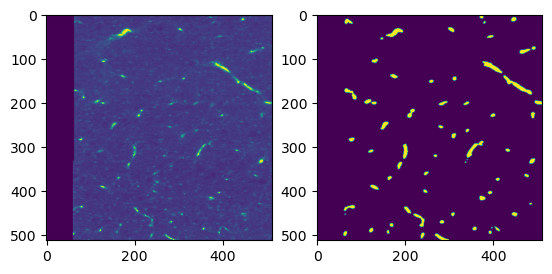

In [2]:
# import train set
train_filepath = "train"
train_dataset = AngioDataset(train_filepath,patch_size=[1, 512, 512])

# show an image and corresponding mask
image_index = 10
train_dataset_raw = train_dataset[image_index][0]
train_dataset_mask = train_dataset[image_index][1]

fig, ax = plt.subplots(1,2)

ax[0].imshow(train_dataset_raw[0,:,:])
ax[1].imshow(train_dataset_mask[0,:,:])


In [3]:
# import validation set
val_filepath = "val"
val_dataset = AngioDataset(val_filepath,patch_size=[1, 512, 512])
print(len(val_dataset))

24


In [4]:
# pass data to DataLoader
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1)

# pass to device
device = torch.device("cuda") if torch.cuda.is_available else torch.device("cpu")

# set model's parameters
final_activation="Sigmoid"
model = UNet(depth=4, in_channels=1, out_channels=1, final_activation=final_activation).to(device)

# set loss function
loss_function = nn.MSELoss()

# set optimizer
lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# set metrics
dice = DiceCoefficient()


In [5]:
# set logger's parameters
logger = SummaryWriter("runs")
log_interval=1

In [6]:
%tensorboard --logdir runs

Launching TensorBoard...

In [7]:
# model's training
n_epochs = 2
checkpoint_save_name  = "checkpoint001"
checkpoint_save_path  = "/group/dl4miacourse/The_Segmenters/Checkpoints"
run_training(model, optimizer, dice, n_epochs,
             train_loader, val_loader, loss_function, log_interval, logger, device=device, key=checkpoint_save_name, path=checkpoint_save_path)

Train Epoch: 0 [0/84 (0%)]	Loss: 0.247782
Train Epoch: 0 [1/84 (1%)]	Loss: 0.018664
Train Epoch: 0 [2/84 (2%)]	Loss: 0.025654
Train Epoch: 0 [3/84 (4%)]	Loss: 0.026718
Train Epoch: 0 [4/84 (5%)]	Loss: 0.029621
Train Epoch: 0 [5/84 (6%)]	Loss: 0.029419
Train Epoch: 0 [6/84 (7%)]	Loss: 0.027206
Train Epoch: 0 [7/84 (8%)]	Loss: 0.024578
Train Epoch: 0 [8/84 (10%)]	Loss: 0.029125
Train Epoch: 0 [9/84 (11%)]	Loss: 0.023376
Train Epoch: 0 [10/84 (12%)]	Loss: 0.020847
Train Epoch: 0 [11/84 (13%)]	Loss: 0.025410
Train Epoch: 0 [12/84 (14%)]	Loss: 0.021019
Train Epoch: 0 [13/84 (15%)]	Loss: 0.027653
Train Epoch: 0 [14/84 (17%)]	Loss: 0.027714
Train Epoch: 0 [15/84 (18%)]	Loss: 0.026787
Train Epoch: 0 [16/84 (19%)]	Loss: 0.023064
Train Epoch: 0 [17/84 (20%)]	Loss: 0.018188
Train Epoch: 0 [18/84 (21%)]	Loss: 0.023422
Train Epoch: 0 [19/84 (23%)]	Loss: 0.026833
Train Epoch: 0 [20/84 (24%)]	Loss: 0.025620
Train Epoch: 0 [21/84 (25%)]	Loss: 0.024609
Train Epoch: 0 [22/84 (26%)]	Loss: 0.027306
Train 

In [8]:
# load train model

trained_model = load_checkpoint(model, path=checkpoint_save_path, optimizer=None, key=checkpoint_save_name)

MSE loss: 0.023426056
Image size is {torch.Size([512, 512])}


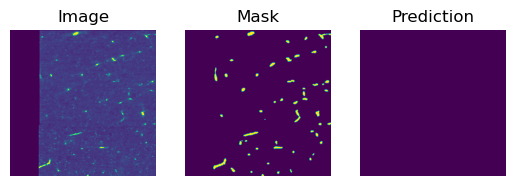

In [9]:
# show results on random image
show_random_dataset_image_with_prediction(train_dataset, trained_model, device)

In [10]:
# show loss plot
test_repatch(trained_model,
    loader,
    device=None,
    saving_path = ""
)


NameError: name 'loader' is not defined